In [1]:
#Vamos a calcular la D_kl y los índices de robustez


In [64]:
import graficas as g
import numpy as np
import entropia as en
import time
import matplotlib.pyplot as plt
import importlib

In [72]:
importlib.reload(en)

<module 'entropia' from 'C:\\proyectos\\repositorios\\pt_robustez\\entropia.py'>

In [125]:
G_BA = g.crear_grafica('barabasi',1000,15,0)
G_WS = g.crear_grafica('watts',1000,30,0.5)

In [126]:
distribucion_BA = g.obtener_distribucion_grados(G_BA)
distribucion_WS = g.obtener_distribucion_grados(G_WS)

In [127]:
grados_BA = [grado for grado,_ in distribucion_BA]
frecuencias_BA = [frecuencia for _,frecuencia in distribucion_BA]

grados_WS = [grado for grado,_ in distribucion_WS]
frecuencias_WS = [frecuencia for _,frecuencia in distribucion_WS]

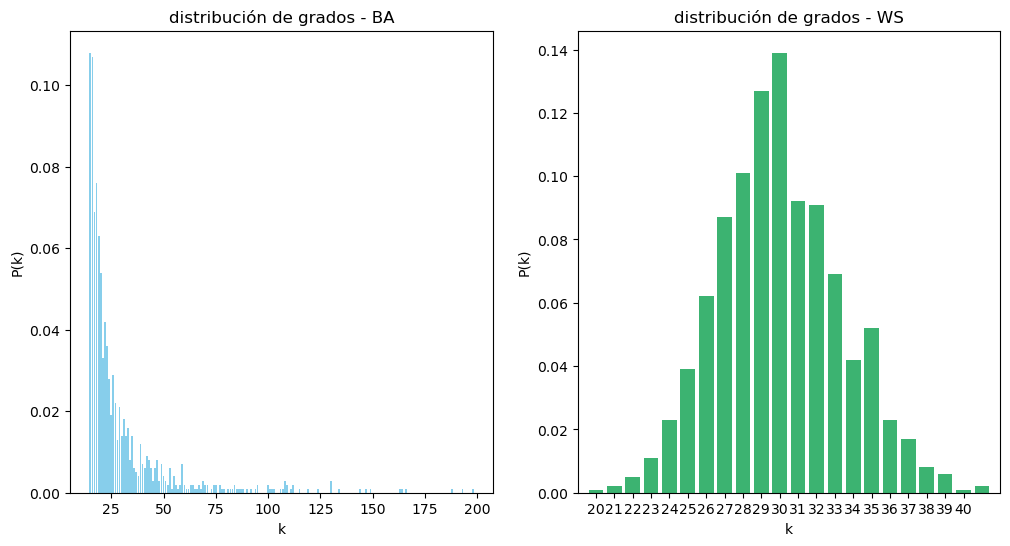

In [129]:
rfig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].bar(grados_BA,frecuencias_BA,color='skyblue')
axs[0].set_title('distribución de grados - BA')
axs[0].set_ylabel('P(k)')
axs[0].set_xlabel('k')

axs[1].bar(grados_WS,frecuencias_WS,color='mediumseagreen')
axs[1].set_xlim(min(grados_WS)-1,max(grados_WS)+1)
axs[1].set_title('distribución de grados - WS')
axs[1].set_ylabel('P(k)')
axs[1].set_xlabel('k')
axs[1].set_xticks(range(min(grados_WS),max(grados_WS)))

In [130]:
#Con las distribuciones anteriores es que vamos a calcular DKL a partir de cada ataque, antes quiero comprobar que si sumen 1 xd
suma_GA = sum(frecuencias_GA)
suma_WS = sum(frecuencias_WS)

print(suma_GA,suma_WS)

1.0000000000000004 1.0


In [131]:
N = len(G_BA)

#vamos a atacar copias
G_1 = G_BA.copy()
G_2 = G_WS.copy()

DKL_BA_fallos = []
DKL_WS_fallos = []

inicio = time.time()

for i in range(N):
    G_1 = g.ataques(G_1,'random')
    G_2 = g.ataques(G_2,'random')

    distribucion_1 = g.obtener_distribucion_grados(G_1)
    distribucion_2 = g.obtener_distribucion_grados(G_2)

    DKL_1 = en.DKL(distribucion_BA,distribucion_1)
    DKL_2 = en.DKL(distribucion_WS,distribucion_2)

    DKL_BA_fallos.append(DKL_1)
    DKL_WS_fallos.append(DKL_2)

final = time.time()

print(f"El tiempo de ejecución fue: {final-inicio}")

El tiempo de ejecución fue: 1.2107152938842773


In [132]:
#vamos a atacar copias
G_1 = G_BA.copy()
G_2 = G_WS.copy()

DKL_BA_ataques = []
DKL_WS_ataques = []

inicio = time.time()

for i in range(N):
    G_1 = g.ataques(G_1,'degree')
    G_2 = g.ataques(G_2,'degree')

    distribucion_1 = g.obtener_distribucion_grados(G_1)
    distribucion_2 = g.obtener_distribucion_grados(G_2)

    DKL_1 = en.DKL(distribucion_BA,distribucion_1)
    DKL_2 = en.DKL(distribucion_WS,distribucion_2)

    DKL_BA_ataques.append(DKL_1)
    DKL_WS_ataques.append(DKL_2)

final = time.time()

print(f"El tiempo de ejecución fue: {final-inicio}")

El tiempo de ejecución fue: 1.908958911895752


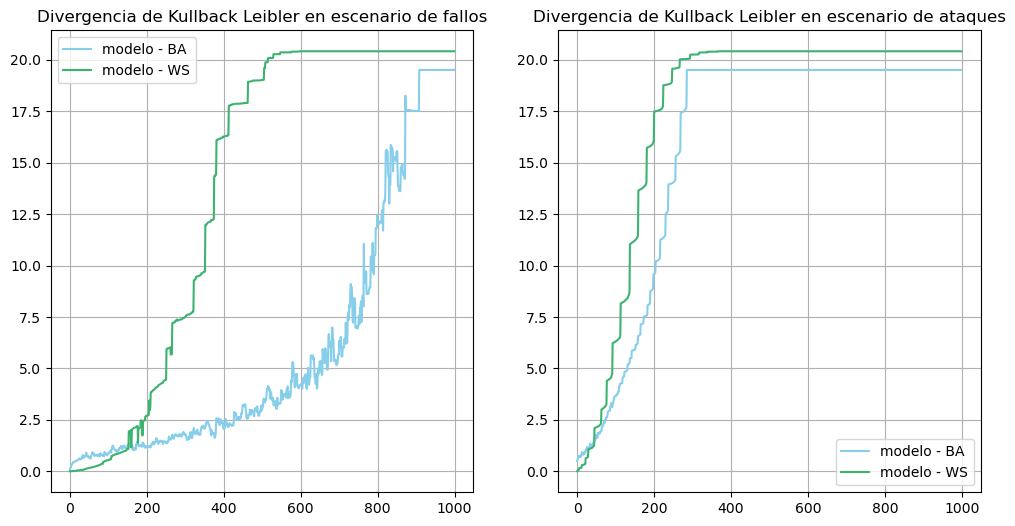

In [133]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(DKL_BA_fallos,label='modelo - BA',markersize=1,color='skyblue')
axs[0].plot(DKL_WS_fallos,label='modelo - WS',markersize=1,color='mediumseagreen')
axs[0].set_title('Divergencia de Kullback Leibler en escenario de fallos')
axs[0].grid(True)
axs[0].legend(loc='best')
axs[1].plot(DKL_BA_ataques,label='modelo - BA',markersize=1,color='skyblue')
axs[1].plot(DKL_WS_ataques,label='modelo - WS',markersize=1,color='mediumseagreen')
axs[1].set_title('Divergencia de Kullback Leibler en escenario de ataques')
axs[1].grid(True)
axs[1].legend(loc='best')

In [121]:
#Ahora vamos a calcular la DKL con respecto a la distribución anterior

In [122]:
G_1 = G_BA.copy()
G_2 = G_WS.copy()

DKL_BA_fallos = []
DKL_WS_fallos = []

inicio = time.time()

for i in range(N):
    distribucion_1_ant = g.obtener_distribucion_grados(G_1)
    distribucion_2_ant = g.obtener_distribucion_grados(G_2)
    
    G_1 = g.ataques(G_1,'random')
    G_2 = g.ataques(G_2,'random')

    distribucion_1_des = g.obtener_distribucion_grados(G_1)
    distribucion_2_des = g.obtener_distribucion_grados(G_2)

    DKL_1 = en.DKL(distribucion_1_ant,distribucion_1_des)
    DKL_2 = en.DKL(distribucion_1_ant,distribucion_2_des)

    DKL_BA_fallos.append(DKL_1)
    DKL_WS_fallos.append(DKL_2)

final = time.time()

print(f"El tiempo de ejecución fue: {final-inicio}")

El tiempo de ejecución fue: 1.8752484321594238


In [123]:
G_1 = G_BA.copy()
G_2 = G_WS.copy()

DKL_BA_ataques = []
DKL_WS_ataques = []

inicio = time.time()

for i in range(N):
    distribucion_1_ant = g.obtener_distribucion_grados(G_1)
    distribucion_2_ant = g.obtener_distribucion_grados(G_2)
    
    G_1 = g.ataques(G_1,'degree')
    G_2 = g.ataques(G_2,'degree')

    distribucion_1_des = g.obtener_distribucion_grados(G_1)
    distribucion_2_des = g.obtener_distribucion_grados(G_2)

    DKL_1 = en.DKL(distribucion_1_ant,distribucion_1_des)
    DKL_2 = en.DKL(distribucion_1_ant,distribucion_2_des)

    DKL_BA_ataques.append(DKL_1)
    DKL_WS_ataques.append(DKL_2)

final = time.time()

print(f"El tiempo de ejecución fue: {final-inicio}")

El tiempo de ejecución fue: 2.051016330718994


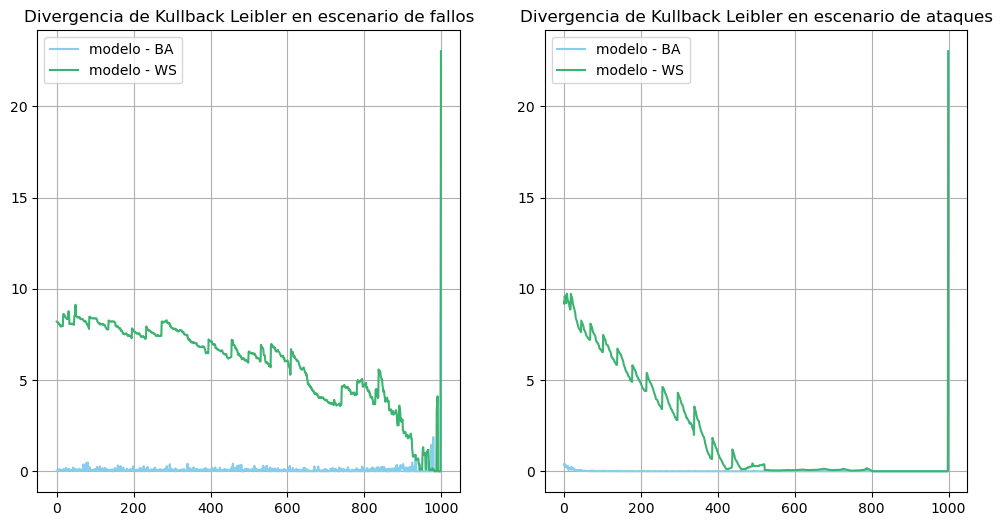

In [124]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(DKL_BA_fallos,label='modelo - BA',markersize=1,color='skyblue')
axs[0].plot(DKL_WS_fallos,label='modelo - WS',markersize=1,color='mediumseagreen')
axs[0].set_title('Divergencia de Kullback Leibler en escenario de fallos')
axs[0].grid(True)
axs[0].legend(loc='best')
axs[1].plot(DKL_BA_ataques,label='modelo - BA',markersize=1,color='skyblue')
axs[1].plot(DKL_WS_ataques,label='modelo - WS',markersize=1,color='mediumseagreen')
axs[1].set_title('Divergencia de Kullback Leibler en escenario de ataques')
axs[1].grid(True)
axs[1].legend(loc='best')